In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [2]:
#################
#helper functions 
#################


def fixAngle(curPos,pastPos,curAngle):
    if curPos[0] == pastPos[0] or curPos[1] == pastPos[1]:
        curAngle = 0
    else:
        curAngle = abs(math.atan((curPos[1]-pastPos[1])/(curPos[0]-pastPos[0])))
    curAngle = curAngle*180/np.pi
    if curPos[0]-pastPos[0] < 0 and curPos[1]-pastPos[1] > 0:
        curAngle = 90*1 + (90-curAngle)
    elif curPos[0]-pastPos[0] < 0 and curPos[1]-pastPos[1] < 0:
        curAngle = 90*2 + (curAngle)
    elif curPos[0]-pastPos[0] > 0 and curPos[1]-pastPos[1] < 0:
        curAngle = 90*3 + (90-curAngle)
    curAngle = curAngle*np.pi/180
    return curAngle

def distF(x,y,estX,estY):
    dist = []
    distX = [i for i in range(0,len(estX))]
    for i in range(0,len(estX)):
        dist.append(math.sqrt((x-estX[i])**2+(y-estY[i])**2))
    return [distX,dist]

def mse(y,dist):
    n = len(dist)
    s = 0
    for i in range(0,n):
        s += (y[i]-dist[i])**2
    return s/n

In [3]:
def firstOrderT(x,y, threashold):
    estX = []
    estY = []
    pac = 0
    tao = 1.0
    th = 5
    curTime = 0
    pastTime = 0
    curVel = 0
    curAngle = 0
    curPos =  [x[1],y[1]]
    pastPos = [x[0],y[0]]
    vel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
    estX.append(pastPos[0])
    estY.append(pastPos[1])

    estX.append(curPos[0])
    estY.append(curPos[1])

    for i in range(2,len(x)):


        curAngle = fixAngle(curPos,pastPos,curAngle)
        
        if curPos[0] == pastPos[0] or curPos[1] == pastPos[1]:
            vel = 0
        else: 
            vel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
        pastPos = [curPos[0],curPos[1]]

        if i%threashold == 0:
            pastPos = [x[i-1],y[i-1]]
            curPos = [x[i],y[i]]
            pac += 1
        else:
            curPos = [curPos[0]+vel*math.cos(curAngle) , curPos[1]+vel*math.sin(curAngle)]
        
        if curPos[0] < boundX[0]:
            curPos[0] = boundX[0]
        elif curPos[0] > boundX[1]:
            curPos[0] = boundX[1]
        elif curPos[1] < boundY[0]:
            curPos[1] = boundY[0]
        elif curPos[1] > boundY[1]:
            curPos[1] = boundY[1]
        
        estX.append(curPos[0])
        estY.append(curPos[1])
    return [estX,estY,pac]

def secondOrderT(x,y,threashold):
    estX = []
    estY = []
    tao = 1.0
    th = 5
    pac = 0
    curPos =  [x[2],y[2]]
    pastPos = [x[1],y[1]]
    pastPos2 = [x[0],y[0]]
    curVel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
    pastVel = math.sqrt((pastPos[0]-pastPos2[0])**2+(pastPos[1]-pastPos2[1])**2)
    
    curAngle = 0
    curAngle = fixAngle(curPos,pastPos,curAngle)
    pastAngle = 0
    pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
    angleVel = (curAngle-pastAngle)/tao
    
    estX.append(pastPos[0])
    estY.append(pastPos[1])
    estX.append(curPos[0])
    estY.append(curPos[1])

    for i in range(2,len(x)):
        #current angle
        if (i-1)%threashold == 0:
            curAngle = fixAngle(curPos,pastPos,curAngle)
            pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
            angleVel = (curAngle-pastAngle)/tao
        else: 
            curAngle = fixAngle(curPos,pastPos,curAngle) + angleVel
            pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
        
        #current velocity
        if curPos[0] == pastPos[0] or curPos[1] == pastPos[1]:
            curVel = 0
        else: 
            curVel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
        
        #past velocity
        if pastPos[0] == pastPos2[0] or pastPos[1] == pastPos2[1]:
            pastVel = 0
        else: 
            pastVel = math.sqrt((pastPos[0]-pastPos2[0])**2+(pastPos[1]-pastPos2[1])**2)
        
        #past pos and past pos 2
        pastPos2 = [pastPos[0],pastPos[1]] 
        pastPos = [curPos[0],curPos[1]]
        
        if i%threashold == 0:
            pastPos2 = [x[i-2],y[i-2]]
            pastPos = [x[i-1],y[i-1]]
            curPos = [x[i],y[i]]
            pac += 1
        else:
            curPos[0] = curPos[0] + curVel*math.cos(curAngle) + 0.5*((curVel*math.cos(curAngle)-pastVel*math.cos(pastAngle))/(1)) 
            curPos[1] = curPos[1] + curVel*math.sin(curAngle) + 0.5*((curVel*math.sin(curAngle)-pastVel*math.sin(pastAngle))/(1))
        
        if curPos[0] < boundX[0]:
            curPos[0] = boundX[0]
        elif curPos[0] > boundX[1]:
            curPos[0] = boundX[1]
        elif curPos[1] < boundY[0]:
            curPos[1] = boundY[0]
        elif curPos[1] > boundY[1]:
            curPos[1] = boundY[1]
        
        estX.append(curPos[0])
        estY.append(curPos[1])
    return [estX,estY, pac]



In [4]:
def firstOrderD(x,y, threashold):
    estX = []
    estY = []
    tao = 1.0
    th = 5
    pac = 0
    curTime = 0
    pastTime = 0
    curVel = 0
    curAngle = 0
    curPos =  [x[1],y[1]]
    pastPos = [x[0],y[0]]
    vel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
    estX.append(pastPos[0])
    estY.append(pastPos[1])

    estX.append(curPos[0])
    estY.append(curPos[1])
    
    for i in range(2,len(x)):

        curAngle = fixAngle(curPos,pastPos,curAngle)
        
        
        if curPos[0] == pastPos[0] or curPos[1] == pastPos[1]:
            vel = 0
        else: 
            vel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
        pastPos = [curPos[0],curPos[1]]

        
        tmpPos = [curPos[0]+vel*math.cos(curAngle) , curPos[1]+vel*math.sin(curAngle)]
        dist = math.sqrt((tmpPos[0]-x[i])**2+(tmpPos[1]-y[i])**2)
        
        if dist > threashold:
            pastPos = [x[i-1],y[i-1]]
            curPos = [x[i],y[i]]
            pac += 1
        else:
            curPos = [curPos[0]+vel*math.cos(curAngle) , curPos[1]+vel*math.sin(curAngle)]
        
        if curPos[0] < boundX[0]:
            curPos[0] = boundX[0]
        elif curPos[0] > boundX[1]:
            curPos[0] = boundX[1]
        elif curPos[1] < boundY[0]:
            curPos[1] = boundY[0]
        elif curPos[1] > boundY[1]:
            curPos[1] = boundY[1]
        
        estX.append(curPos[0])
        estY.append(curPos[1])
    return [estX,estY, pac]

def secondOrderD(x,y,threashold):
    estX = []
    estY = []
    tao = 1.0
    th = 5
    pac = 0
    curPos =  [x[2],y[2]]
    pastPos = [x[1],y[1]]
    pastPos2 = [x[0],y[0]]
    curVel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
    pastVel = math.sqrt((pastPos[0]-pastPos2[0])**2+(pastPos[1]-pastPos2[1])**2)
    
    curAngle = 0
    curAngle = fixAngle(curPos,pastPos,curAngle)
    pastAngle = 0
    pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
    angleVel = (curAngle-pastAngle)/tao
    
    estX.append(pastPos[0])
    estY.append(pastPos[1])
    estX.append(curPos[0])
    estY.append(curPos[1])
    dist = 0
    for i in range(2,len(x)):
        if dist > threashold == 0:
            curAngle = fixAngle(curPos,pastPos,curAngle)
            pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
            angleVel = (curAngle-pastAngle)/tao
        else: 
            curAngle = fixAngle(curPos,pastPos,curAngle) + angleVel
            pastAngle = fixAngle(pastPos,pastPos2,pastAngle)
        
        #current velocity
        if curPos[0] == pastPos[0] or curPos[1] == pastPos[1]:
            curVel = 0
        else: 
            curVel = math.sqrt((curPos[0]-pastPos[0])**2+(curPos[1]-pastPos[1])**2)
        
        #past velocity
        if pastPos[0] == pastPos2[0] or pastPos[1] == pastPos2[1]:
            pastVel = 0
        else: 
            pastVel = math.sqrt((pastPos[0]-pastPos2[0])**2+(pastPos[1]-pastPos2[1])**2)
        
        #past pos and past pos 2
        pastPos2 = [pastPos[0],pastPos[1]] 
        pastPos = [curPos[0],curPos[1]]
        
        
        tmpPos = [0,0]
        tmpPos[0] = curPos[0] + curVel*math.cos(curAngle) + 0.5*((curVel*math.cos(curAngle)-pastVel*math.cos(pastAngle))/(1)) 
        tmpPos[1] = curPos[1] + curVel*math.sin(curAngle) + 0.5*((curVel*math.sin(curAngle)-pastVel*math.sin(pastAngle))/(1))
        dist = math.sqrt((tmpPos[0]-x[i])**2+(tmpPos[1]-y[i])**2)
        
        
        if dist > threashold:
            pastPos2 = [x[i-2],y[i-2]]
            pastPos = [x[i-1],y[i-1]]
            curPos = [x[i],y[i]]
            pac += 1
        else:
            curPos[0] = curPos[0] + curVel*math.cos(curAngle) + 0.5*((curVel*math.cos(curAngle)-pastVel*math.cos(pastAngle))/(1)) 
            curPos[1] = curPos[1] + curVel*math.sin(curAngle) + 0.5*((curVel*math.sin(curAngle)-pastVel*math.sin(pastAngle))/(1))
        
        if curPos[0] < boundX[0]:
            curPos[0] = boundX[0]
        elif curPos[0] > boundX[1]:
            curPos[0] = boundX[1]
        elif curPos[1] < boundY[0]:
            curPos[1] = boundY[0]
        elif curPos[1] > boundY[1]:
            curPos[1] = boundY[1]
        
        estX.append(curPos[0])
        estY.append(curPos[1])
    return [estX,estY, pac]



In [87]:
def graph(x,y,thD,thT):
    [estX,estY, pacFT] = firstOrderD(x,y,thD)
    [estXsec,estYsec, pacST] = secondOrderD(x,y,thD)
    [estX2,estY2, pacF] = firstOrderT(x,y,thT)
    [estX2sec,estY2sec, pacS] = secondOrderT(x,y,thT)
    plt.figure(figsize=(15,10))
    plt.plot(x,y,color='blue')
    plt.plot(estX,estY,color='red')
    plt.plot(estXsec,estYsec,color='green')
    plt.plot(estX2,estY2,color='green')
    plt.plot(estX2sec,estY2sec,color='yellow')
    plt.scatter(posB[0],posB[1],color='Green')
    [distX, dist]  = distF(posB[0],posB[1],x,y)
    [distX, distS] = distF(posB[0],posB[1],estX,estY)
    [distX, distDS] = distF(posB[0],posB[1],estXsec,estYsec)
    [distX, distD] = distF(posB[0],posB[1],estX2,estY2)
    [distX, distDD] = distF(posB[0],posB[1],estX2sec,estY2sec)
    plt.figure(figsize=(25,10))
    plt.plot(distX,dist,color='blue')
    plt.plot(distX,distS,color='red')
    plt.plot(distX,distDS,color='green')
    plt.plot(distX,distD,color='green')
    plt.plot(distX,distDD,color='yellow')
    print('mse first order static      : ' + str(mse(dist,distS)) + ' \t--- packets: ' + str(pacFT))
    print('mse second order static     : ' + str(mse(dist,distDS)) + ' \t--- packets: ' + str(pacST))
    print('mse first order static time : ' + str(mse(dist,distD)) + ' \t--- packets: ' + str(pacF))
    print('mse second order static time: ' + str(mse(dist,distDD)) + ' \t--- packets: ' + str(pacS))
    
def score(x,y,thDmin,thDmax,thDstep,thTmin,thTmax,thTstep):
    
    [distX, distY]  = distF(posB[0],posB[1],x,y)
    lossFD = []
    packFD = []
    lossSD = []
    packSD = []
    lossFT = []
    packFT = []
    lossST = []
    packST = []
    
    
    for thD in np.arange(thDmin,thDmax,thDstep):

        [estXFD,estYFD, pacFD] = firstOrderD(x,y,thD)
        [estXSD,estYSD, pacSD] = secondOrderD(x,y,thD)
        [distX, distFD] = distF(posB[0],posB[1],estXFD,estYFD)
        [distX, distSD] = distF(posB[0],posB[1],estXSD,estYSD)
#         print('mse first order static      : ' + str(mse(distY,distFD)) + ' \t--- packets: ' + str(pacFD))
#         print('mse second order static     : ' + str(mse(distY,distSD)) + ' \t--- packets: ' + str(pacSD))
#         print('------------------------------------------------------------------------------------------')
        lossFD.append(mse(distY,distFD))
        packFD.append(pacFD)
        lossSD.append(mse(distY,distSD))
        packSD.append(pacSD)
    print()
    print()
    print()
    
    for thT in range(thTmin,thTmax,thTstep):

        [estXFT,estYFT, pacFT] = firstOrderT(x,y,thT)
        [estXST,estYST, pacST] = secondOrderT(x,y,thT)

        [distX, distFT] = distF(posB[0],posB[1],estXFT,estYFT)
        [distX, distST] = distF(posB[0],posB[1],estXST,estYST)

        
#         print('mse first order static time : ' + str(mse(distY,distFT)) + ' \t--- packets: ' + str(pacFT))
#         print('mse second order static time: ' + str(mse(distY,distST)) + ' \t--- packets: ' + str(pacST))
#         print('------------------------------------------------------------------------------------------')
        lossFT.append(mse(distY,distFT))
        packFT.append(pacFT)
        lossST.append(mse(distY,distST))
        packST.append(pacST)
    
    plt.figure(figsize=(25,10))
    plt.plot(packFD,lossFD,color='blue')
    plt.plot(packSD,lossSD,color='red')
    plt.plot(packFT,lossFT,color='green')
    plt.plot(packST,lossST,color='orange')

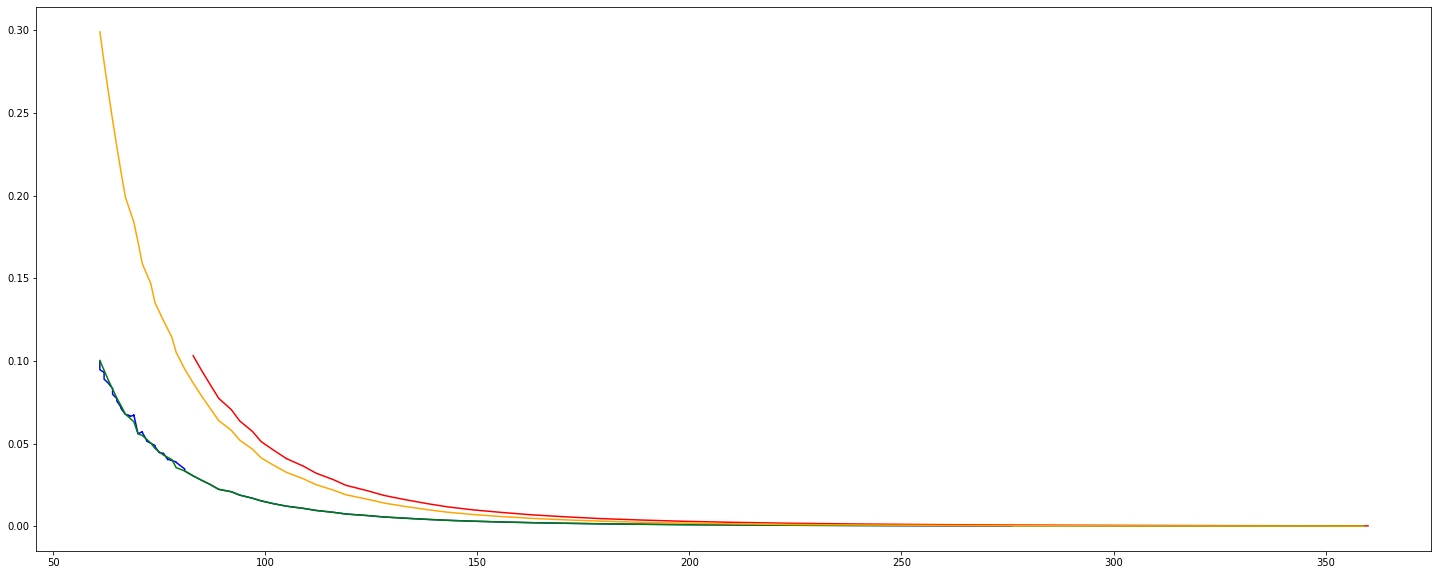

In [88]:
#stationary and circle
posA = [0,0]
posB = [0,3]
boundX = [-2.5,2.5]
boundY = [-2.5,3]
radius = 2
r = 360*10
#mul = 10
def updatePoint(time, rad, centerX,centerY):
    return [ rad*np.cos(time)+centerX , rad*np.sin(time)+centerY ]

x = []
y = []
for i in range(0,r):
    [tmpX,tmpY] = updatePoint((i)*np.pi/180,radius,0,0)
    x.append(tmpX)
    y.append(tmpY)

#graph(x,y,0.025,10)
score(x,y,0.05,1,0.01,10,60,1)

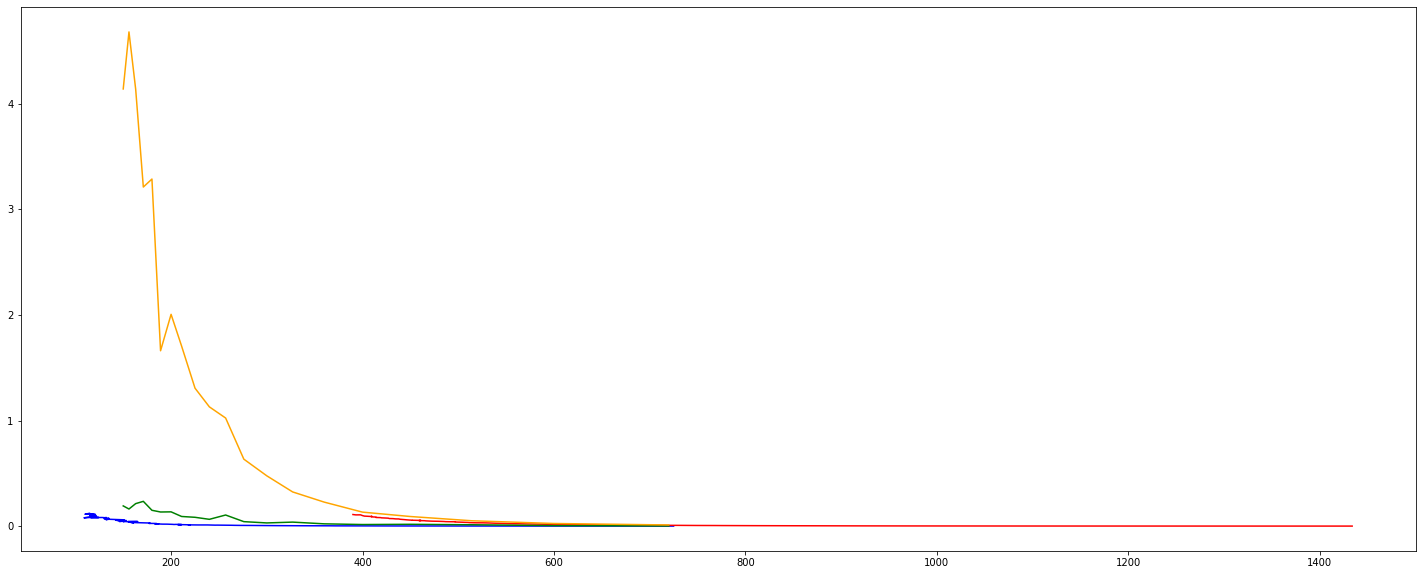

In [89]:
###slow changing

#stationary and random
posA = [0,0]
posB = [0,0]
velA = random.uniform(0,0.05)
angleA = (random.uniform(0,360)%360)*np.pi/180
boundX = [-50,50]
boundY = [-50,50]
random.seed(datetime.now())

r=360*10

def updatePoint(a,b):
    #velocity, angle
    global velA, angleA
    velA   += (random.uniform(-0.01,0.01))
    angleA += (random.uniform(a,b))*np.pi/180
x = []
y = []
x.append(posA[0])
y.append(posA[1])
for i in range(0,r):
    tmpPos = [posA[0],posA[1]]
    tmpPos[0] += velA*np.sin(angleA)
    tmpPos[1] += velA*np.cos(angleA)
    while tmpPos[0] > boundX[1] or tmpPos[0] < boundX[0] or tmpPos[1] > boundY[1] or tmpPos[1] < boundY[0]:
        updatePoint(-90,90)
        tmpPos = [posA[0],posA[1]]
        tmpPos[0] += velA*np.sin(angleA)
        tmpPos[1] += velA*np.cos(angleA)
    x.append(tmpPos[0])
    y.append(tmpPos[1])
    posA = tmpPos
    updatePoint(-5,5)
    
    
#graph(x,y,.5,7)
score(x,y,0.05,1.0,0.01,5,25,1)

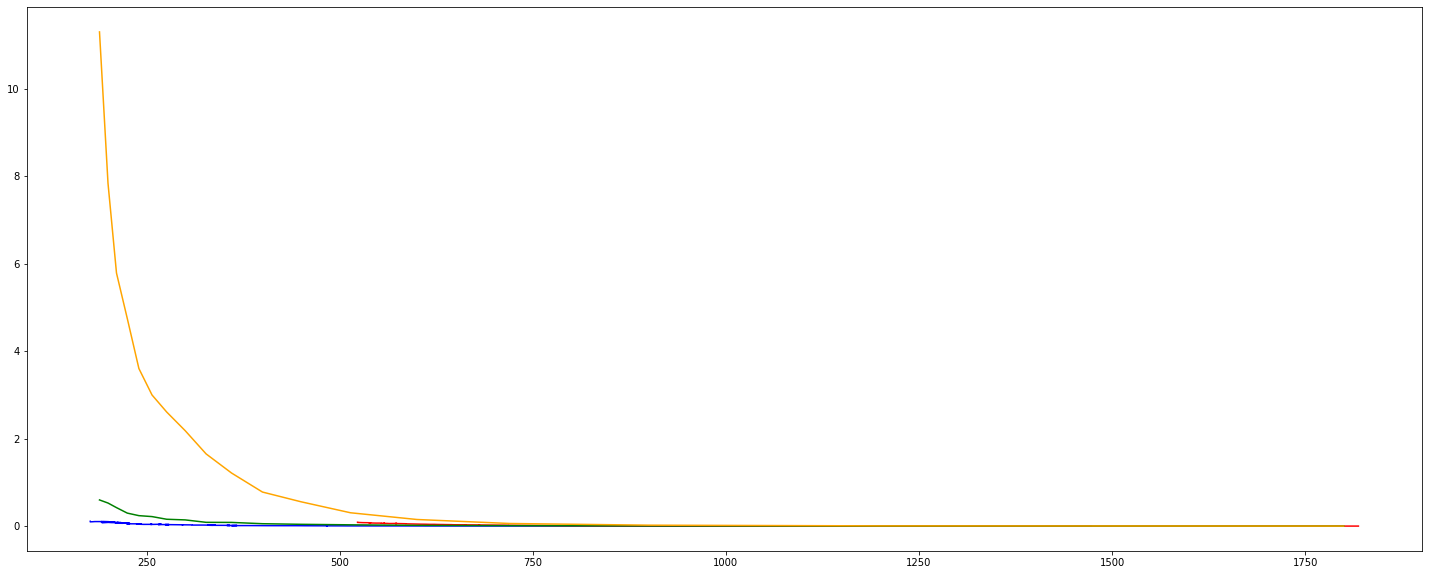

In [90]:
###fast changing 


#stationary and random
posA = [0,0]
posB = [0,0]
velA = random.uniform(0,0.05)
angleA = (random.uniform(0,360)%360)*np.pi/180
boundX = [-50,50]
boundY = [-50,50]
random.seed(datetime.now())

r=360*10

def updatePoint(a,b):
    #velocity, angle
    global velA, angleA
    velA   += (random.uniform(-0.01,0.01))
    angleA += (random.uniform(a,b))*np.pi/180
x = []
y = []
x.append(posA[0])
y.append(posA[1])
for i in range(0,r):
    tmpPos = [posA[0],posA[1]]
    tmpPos[0] += velA*np.sin(angleA)
    tmpPos[1] += velA*np.cos(angleA)
    while tmpPos[0] > boundX[1] or tmpPos[0] < boundX[0] or tmpPos[1] > boundY[1] or tmpPos[1] < boundY[0]:
        updatePoint(-90,90)
        tmpPos = [posA[0],posA[1]]
        tmpPos[0] += velA*np.sin(angleA)
        tmpPos[1] += velA*np.cos(angleA)
    x.append(tmpPos[0])
    y.append(tmpPos[1])
    posA = tmpPos
    updatePoint(-20,20)
    
    
#graph(x,y,.5,7)
score(x,y,0.05,1.0,0.01,2,20,1)